<h1 style="background-color:greenyellow;font-family:serif;color:dimgrey;font-size:350%;text-align:center;border-radius: 15px 50px;">Twitter sentiment analysis</h1>

# Table Of Content

* [1. Introduction](#1)
    * [1.1 Libraries And Utilities](#1.1)
    * [1.2 Data Loading](#1.2)
    * [1.3 Data Preprocessing](#1.3)
* [2. Wordclouds](#2)
* [3. Sentiments of tweets by brand](#3)
* [4. Tokenization and Stopwords](#4)
* [5. Logistic Regression](#5)
* [6. XGBoost](#6)

<a id="1"></a>
<h3 style="background-color:greenyellow;font-family:serif;color:dimgrey;font-size:300%;text-align:center;border-radius: 15px 50px;">Introduction</h3>

In the ever-evolving landscape of social media, Twitter stands as a vibrant platform where diverse opinions, emotions, and sentiments converge in real-time. Unraveling the sentiments expressed in tweets has become a pivotal task for understanding public perception, gauging market trends, and even monitoring societal sentiments on various issues.

This project aims to harness the power of two robust machine learning algorithms — Logistic Regression and XGBoost — to dissect and interpret the sentiment hidden within the vast sea of tweets. The primary goal is to develop a sophisticated sentiment analysis model capable of classifying tweets into distinct sentiment categories such as positive, negative, or neutral. By leveraging logistic regression and XGBoost, we aim to create models that not only discern sentiments accurately but also provide insights into the factors influencing sentiment dynamics on Twitter.

<a id="1.1"></a>
<h3 style="background-color:greenyellow;font-family:serif;color:dimgrey;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [1]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder 
import re 
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moude\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<a id="1.2"></a>
<h3 style="background-color:greenyellow;font-family:serif;color:dimgrey;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Loading</h3>

In [2]:
# Validation dataset
valid = pd.read_csv(r"C:\Users\moude\Desktop\Projetcs-data science\GitHub\twitter-sentiment-analysis\twitter_validation.csv", header=None)
# Training dataset
train = pd.read_csv(r"C:\Users\moude\Desktop\Projetcs-data science\GitHub\twitter-sentiment-analysis\twitter_training.csv", header=None)

In [3]:
train

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


<a id="1.3"></a>
<h3 style="background-color:greenyellow;font-family:serif;color:dimgrey;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Preprocessing</h3>

We should rename the columns to better deal with the data.

In [3]:
train.columns=['id','information','type','text']
valid.columns=['id','information','type','text']

In [5]:
train

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


We will format the tweets such that they are all in lowercase, in string format and with no special characters.

In [4]:
train["lower"] = train.text.str.lower() #lowercase
train["lower"] = [str(data) for data in train.lower] #converting all to string
train["lower"] = train.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
valid["lower"] = valid.text.str.lower() #lowercase
valid["lower"] = [str(data) for data in valid.lower] #converting all to string
valid["lower"] = valid.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [33]:
train

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...


<a id="2"></a>
<h3 style="background-color:greenyellow;font-family:serif;color:dimgrey;font-size:250%;text-align:center;border-radius: 15px 50px;">Wordclouds</h3>

A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance.

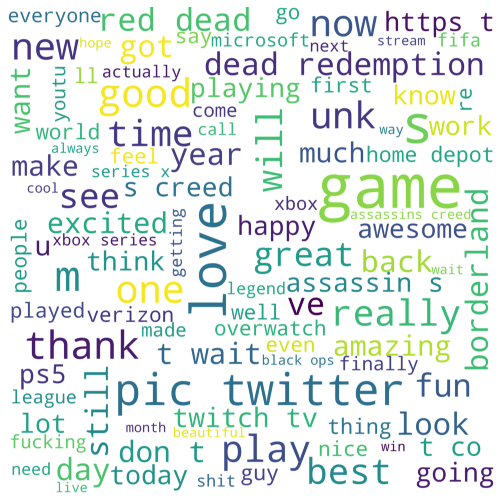

In [5]:
word_cloud_text = ''.join(train[train["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As for the negative tweets, some curse words were the most important while the names of some games and industries were also very used, such as facebook and eamaddennfl. 

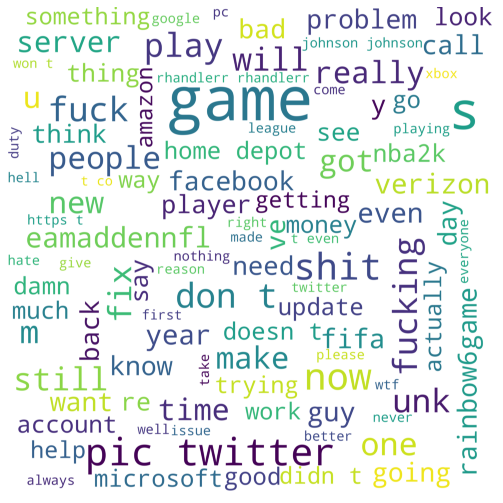

In [46]:
word_cloud_neg = ''.join(train[train["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_neg)
#Figure properties
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The irrelevant tweets show a similar trend as negative ones, something that will impact the overall prediction performance.

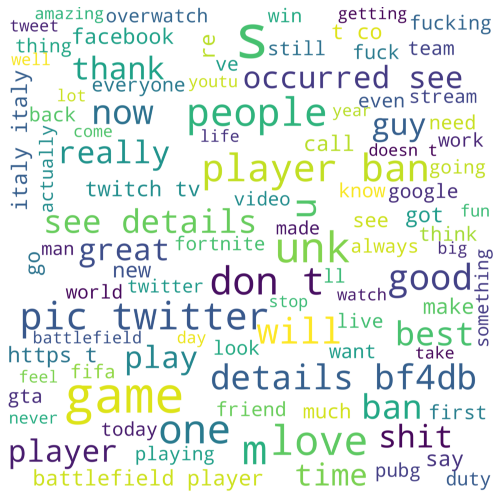

In [47]:
word_cloud_irr = ''.join(train[train["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_irr)
#Figure properties
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Then, on the neutral side, there are almost no curse words and the most important ones are different from the other 3 categories.

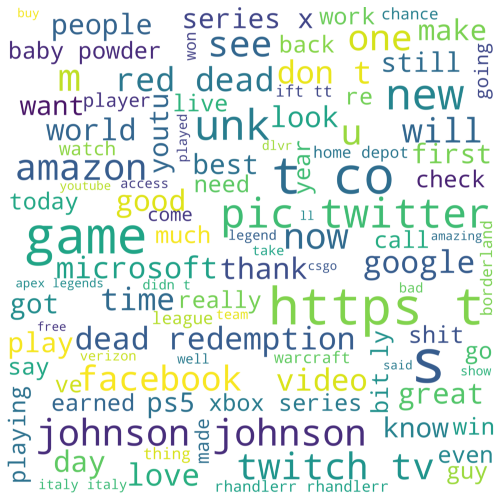

In [49]:
word_cloud_neu = ''.join(train[train["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_neu)
#Figure properties
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a id="3"></a>
<h3 style="background-color:greenyellow;font-family:serif;color:dimgrey;font-size:250%;text-align:center;border-radius: 15px 50px;">Sentiments of tweets by brand</h3>

Finally, in this section, the information was grouped by the brand (or in this case the column information) to make a barplot that shows the number of tweets for each one.

In [12]:
brand_data = train.groupby(by=["information","type"]).count().reset_index()

In [13]:
cross_tab = pd.crosstab(train['information'], train['type'], normalize='index').T

In [14]:
brands = list(brand_data["information"].unique())
sentiments = list(brand_data["type"].unique())

In [15]:
cross_tab.columns = brands

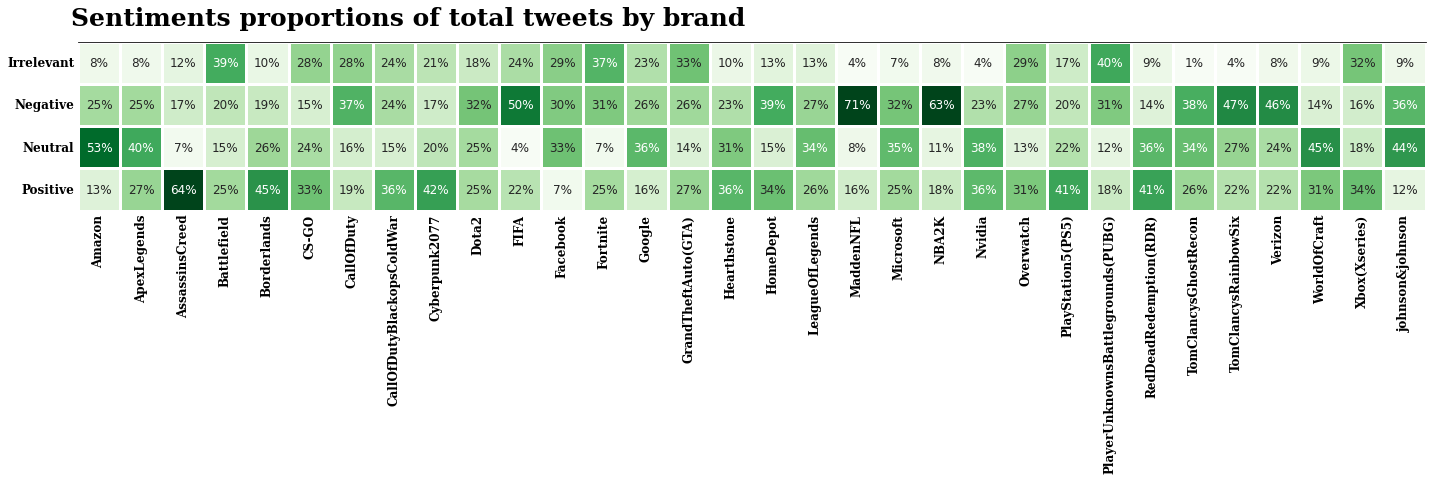

In [16]:
fig, ax = plt.subplots(figsize=(20, 20))


sns.heatmap(cross_tab.loc[sentiments,brands],cmap='Greens',square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(0.52, .57, 'Sentiments proportions of total tweets by brand', fontweight='bold', fontfamily='serif', fontsize=25,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=12, fontweight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=12, fontweight = 'bold')

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

<a id="4"></a>
<h3 style="background-color:greenyellow;font-family:serif;color:dimgrey;font-size:250%;text-align:center;border-radius: 15px 50px;">Tokenization and Stopwords</h3>

In [17]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


Before the modeling step we will remove the stopwords.

In [18]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')

<a id="5"></a>
<h3 style="background-color:greenyellow;font-family:serif;color:dimgrey;font-size:250%;text-align:center;border-radius: 15px 50px;">Logistic Regression</h3>

In [19]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [20]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train, test_size=0.3, random_state=42)

In [21]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

In [22]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

The total number of tweets for each category shows that negative and positive are the most registered while the irrelevant is the lowest.

In [23]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.300781
Positive      0.284401
Neutral       0.242089
Irrelevant    0.172729
Name: type, dtype: float64

With this data, the Logistic Regression Model was trained, where accuracy of 82% on the test dataset was obtained while on the validation dataset this value increased to 92%.

In [24]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  82.72706985047981


In [25]:
#Validation data
X_val_bow = bow_counts.transform(valid.lower)
y_val_bow = valid['type']

In [26]:
X_val_bow

<1000x28307 sparse matrix of type '<class 'numpy.int64'>'
	with 12908 stored elements in Compressed Sparse Row format>

In [27]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  92.80000000000001


In [28]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(valid.lower)

In [29]:
X_train_bow

<52277x1314428 sparse matrix of type '<class 'numpy.int64'>'
	with 3631481 stored elements in Compressed Sparse Row format>

In [30]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  90.10042401249721


In [31]:
y_val_bow = valid['type']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy on the validation set: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy on the validation set:  98.4


<a id="6"></a>
<h3 style="background-color:greenyellow;font-family:serif;color:dimgrey;font-size:250%;text-align:center;border-radius: 15px 50px;">XGBoost</h3>

In [32]:
le = LabelEncoder()
y_train_bow_num = le.fit_transform(y_train_bow)
y_test_bow_num=le.transform(y_test_bow)
y_val_bow_num=le.transform(y_val_bow)

In [33]:
%%time
XGB=XGBClassifier(objective="multi:softmax",n_estimators=1000,colsample_bytree=0.6, subsample=0.6)
XGB.fit(X_train_bow, y_train_bow_num)
# Prediction
test_pred_2 = XGB.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow_num, test_pred_2) * 100)

Accuracy:  83.89198839544744
CPU times: total: 2h 19min 37s
Wall time: 50min 50s


In [35]:
y_val_bow = valid['type']
Val_pred_2 = XGB.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow_num, Val_pred_2) * 100)

Accuracy:  94.19999999999999


At a first glance, with the default XGBoost parameters, the model gets a worse accuracy. For this reason, an additional cell was added to see the training performance:

In [36]:
test_pred_N = XGB.predict(X_train_bow)
print("Accuracy: ", accuracy_score(y_train_bow_num, test_pred_N) * 100)

Accuracy:  93.55357040381047
